# Demonstrate of Pandas for Time Series Plotting

In [1]:
import pandas as pd
import numpy as np
from control import tf, step_response, c2d
import matplotlib.pyplot as plt

# Sample time
Ts = 0.5

# Define 2 tranfer functions
tf1 = c2d(tf(1, [2, 1]), Ts)
tf2 = c2d(tf(1, [5, 1]), Ts)

# Simulate both systems
T = Ts*np.arange(0, 50)
T_out, y_out1 = step_response(tf1, T)  # Note: T is a pd.Index but still works here
T_out, y_out2 = step_response(tf2, T)

In [2]:
# Convert outputs to Pandas series
T = pd.Index(T, name='Time (s)')
ts1 = pd.Series(y_out1, index=T, name='System 1')
ts2 = pd.Series(y_out2, index=T, name='System 2')

In [3]:
sim_results = pd.concat([ts1, ts2], axis=1)
sim_results.head()

,System 1,System 2
Time (s),,
0.0,0.000000,0.000000
0.5,0.221199,0.095163
1.0,0.393469,0.181269
1.5,0.527633,0.259182
2.0,0.632121,0.329680


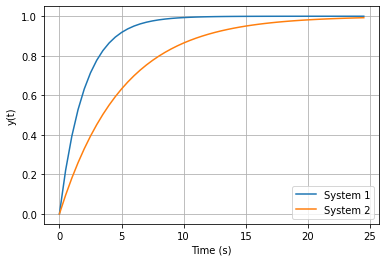

In [4]:
# Both lines on same plot
ts1.plot()
ts2.plot()
plt.ylabel('y(t)')
plt.grid()
plt.legend()
plt.show()

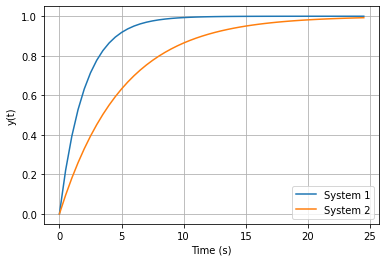

In [5]:
# Or alternatively
sim_results.plot(grid=True)
plt.ylabel('y(t)')
plt.show()

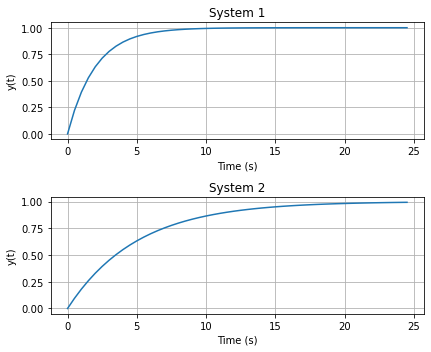

In [6]:
# Lines on separate plots
fig, axes = plt.subplots(2, 1, figsize=(6, 5))

for label, ax in zip(sim_results, axes):
    sim_results[label].plot(ax=ax, title=label)
    ax.set_ylabel('y(t)')
    ax.grid()

plt.tight_layout()
plt.show()

## Use of Pandas datetime index

Pandas has sophisitcated time and date indexing but this is arguably less useful for control system design since we don't usually care about minutes, hours, days, months, etc. or what date it is.

In [7]:
# Simulate both systems
Ts = 0.5
K = pd.RangeIndex(0, 50, name='Sample (k)')
T = pd.TimedeltaIndex(Ts*K, unit='s', name='Time')

In [8]:
# Simulate both systems
Ts = 1
K = pd.RangeIndex(0, 50, name='Sample (k)')
T = pd.TimedeltaIndex(Ts*K, unit='s', name='Time')
T_out, y_out1 = step_response(tf1, T.total_seconds())
T_out, y_out2 = step_response(tf2, T.total_seconds())

data = {
    'System 1': y_out1,
    'System 2': y_out2
}
# Convert outputs straight to Pandas dataframe
sim_results = pd.DataFrame(data, index=T)
sim_results.head()

,System 1,System 2
Time,,
0 days 00:00:00,0.000000,0.000000
0 days 00:00:01,0.393469,0.181269
0 days 00:00:02,0.632121,0.329680
0 days 00:00:03,0.776870,0.451188
0 days 00:00:04,0.864665,0.550671


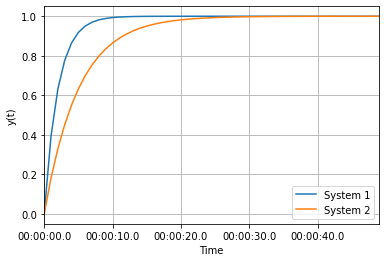

In [9]:
# Both lines on same plot
sim_results.plot(grid=True, ylabel='y(t)')
plt.show()

## Problem: Pandas plotting does not seem to have a step plot option

In [10]:
# ts1.plot(kind='step')  # raises ValueError: step is not a valid plot kind
